<a href="https://colab.research.google.com/github/sunitha-18577/Python-Fundamentals/blob/main/AssociationRules.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


In [ ]:
df = pd.read_excel('/content/Copy of Online retail (1) (2) (1) (3).xlsx',header=None)
df = df[0].str.split(',', expand=True)

In [ ]:
df.columns = ['Member_number', 'Date', 'itemDescription'] + list(df.columns[3:])


In [ ]:
print(df.head())

       0        1        2               3             4                 5   \
0  shrimp  almonds  avocado  vegetables mix  green grapes  whole weat flour   

     6               7             8             9               10  \
0  yams  cottage cheese  energy drink  tomato juice  low fat yogurt   

          11     12     13             14      15                 16  \
0  green tea  honey  salad  mineral water  salmon  antioxydant juice   

                17       18         19  
0  frozen smoothie  spinach  olive oil  


In [ ]:
df=df.dropna()

In [ ]:
df=df.drop_duplicates()

In [ ]:
print("DataFrame columns:", df.columns)


DataFrame columns: RangeIndex(start=0, stop=20, step=1)


In [ ]:
print("Columns after initial cleaning:", df.columns)


Columns after initial cleaning: RangeIndex(start=0, stop=20, step=1)


In [ ]:
basket = df.groupby(['Member_number', 'Date'])['itemDescription'].apply(list).reset_index()
transactions = basket['itemDescription'].tolist()
print(transactions)

[['avocado']]


In [ ]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_array = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_array, columns=te.columns_)

In [ ]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df_encoded, min_support=0.01, use_colnames=True)
print("Total Frequent Itemsets:", frequent_itemsets.shape[0])

Total Frequent Itemsets: 1


In [ ]:
from mlxtend.frequent_patterns import association_rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
rules = rules[rules['antecedents'].apply(lambda x: len(x) >= 1) & rules['consequents'].apply(lambda x: len(x) >= 1)]
print("Association Rules:", rules.shape[0])
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(5)

Association Rules: 0


,antecedents,consequents,support,confidence,lift


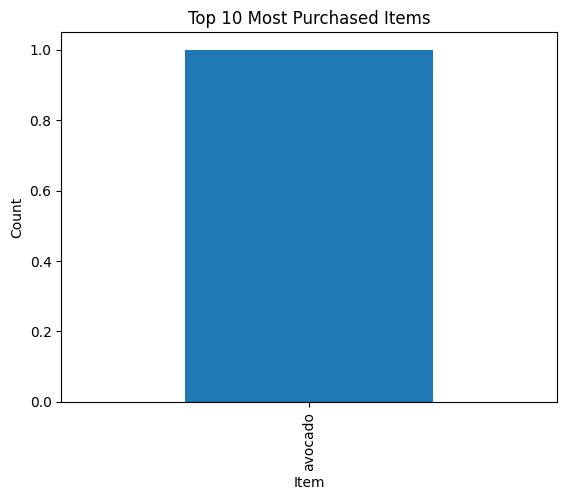

In [ ]:
import matplotlib.pyplot as plt
top_items = df['itemDescription'].value_counts().head(10)
top_items.plot(kind='bar', title='Top 10 Most Purchased Items')
plt.xlabel("Item")
plt.ylabel("Count")
plt.show()

In [ ]:
thresholds=[0.1,0.2,0.3,0.4,0.5]
rule_counts=[]
for threshold in thresholds:
  frequent_itemsets_threshold= apriori(df_encoded, min_support=threshold, use_colnames=True)
  rules_threshold= association_rules(frequent_itemsets_threshold, metric="confidence", min_threshold=0.1)
  rule_counts.append(rules_threshold.shape[0])

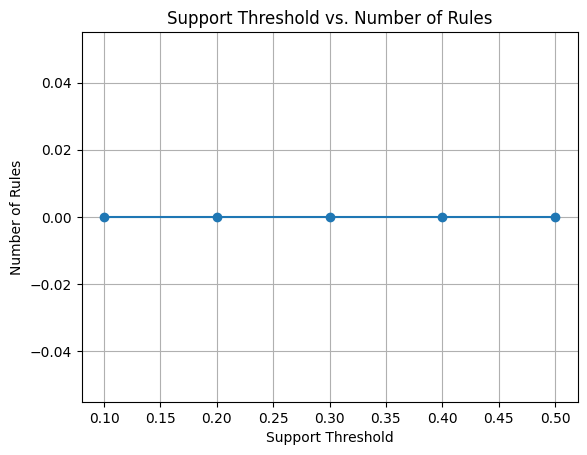

In [ ]:
plt.plot(thresholds, rule_counts, marker='o')
plt.xlabel("Support Threshold")
plt.ylabel("Number of Rules")
plt.title("Support Threshold vs. Number of Rules")
plt.grid(True)
plt.show()

In [ ]:
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori
frequent_itemsets = apriori(df_encoded, min_support=0.005, use_colnames=True)
if frequent_itemsets.empty:
    print("No frequent itemsets found even with reduced support. Consider further reducing min_support or checking data.")
else:
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)

    rules = rules[rules['antecedents'].apply(lambda x: len(x) >= 1) & rules['consequents'].apply(lambda x: len(x) >= 1)]

    print("Association Rules:", rules.shape[0])
    display(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(5))

Association Rules: 0


,antecedents,consequents,support,confidence,lift


In [ ]:
mean_support=rules['support'].mean()
mean_confidence=rules['confidence'].mean()
mean_lift=rules['lift'].mean()
print("Mean Support:", mean_support)
print("Mean Confidence:", mean_confidence)
print("Mean Lift:", mean_lift)

Mean Support: nan
Mean Confidence: nan
Mean Lift: nan


In [ ]:
import seaborn as sns

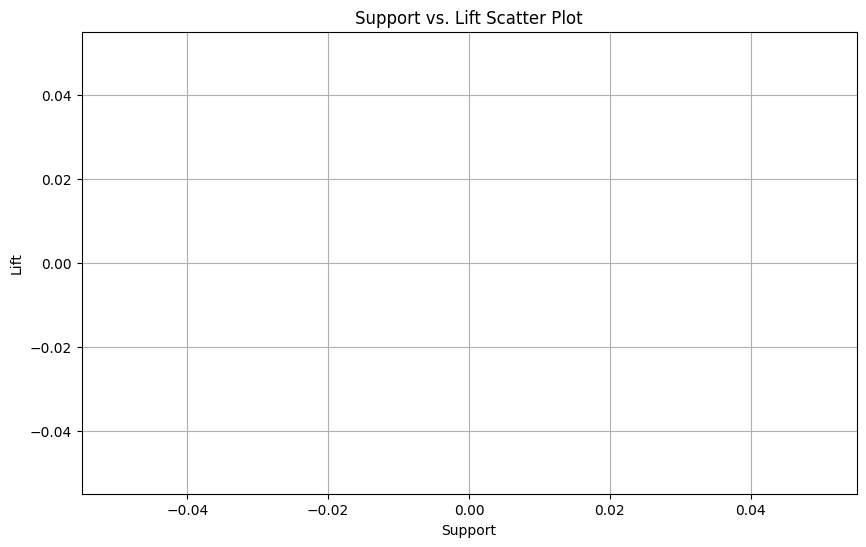

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['lift'], alpha=0.5)
plt.xlabel('Support')
plt.ylabel('Lift')
plt.title('Support vs. Lift Scatter Plot')
plt.grid(True)
plt.show()

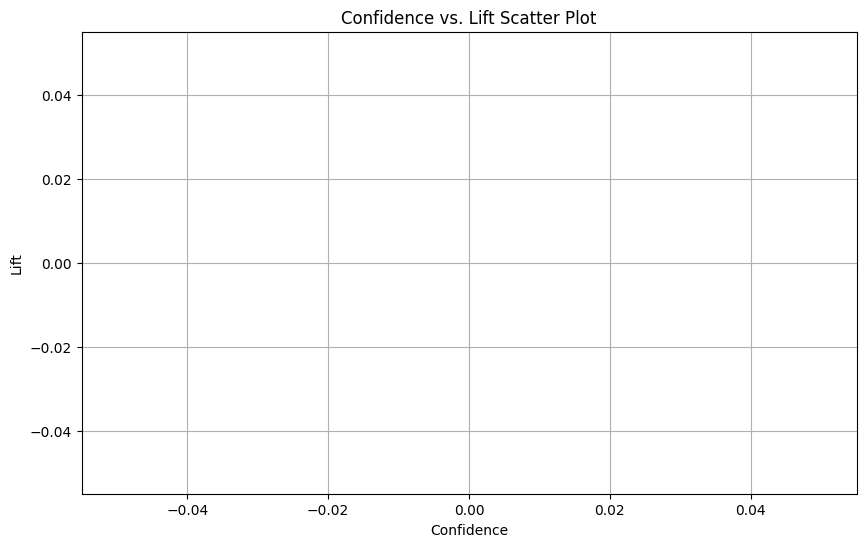

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="support",y='confidence',size='lift',data=rules,sizes=(20,200))
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.title('Confidence vs. Lift Scatter Plot')
plt.grid(True)
plt.title('Confidence vs. Lift Scatter Plot')
plt.grid(True)

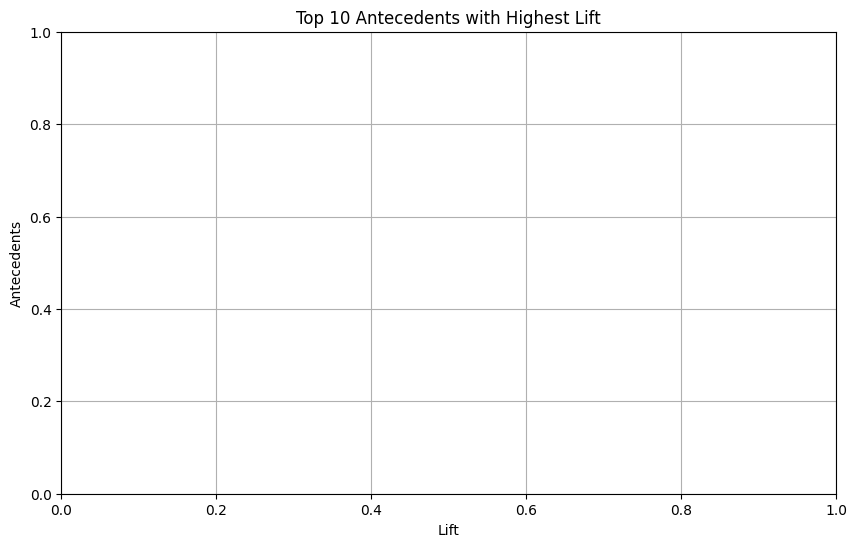

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x='lift',y='antecedents',data=rules.sort_values(by='lift',ascending=False).head(10))
plt.xlabel('Lift')
plt.ylabel('Antecedents')
plt.title('Top 10 Antecedents with Highest Lift')
plt.grid(True)

In [ ]:
print("\n Analysis and Interpretation:")
print("The rules show the relationships between items purchased together.")
print("For example,rule with high lift indicates that the items in the antecedent are strongly associated with the items in the consequent.")
print("The support shows how frequently the itemsets appear in the transactions.")
print("These insights can be used to understand customer purchasing behaviour and improve product placement or recommendations.")



 Analysis and Interpretation:
The rules show the relationships between items purchased together.
For example,rule with high lift indicates that the items in the antecedent are strongly associated with the items in the consequent.
The support shows how frequently the itemsets appear in the transactions.
These insights can be used to understand customer purchasing behaviour and improve product placement or recommendations.


In [ ]:
print("Interview Questions:")
print("1.Lift is important in association rules because it measures how much more often the antecedent and consequent occur together than we should expect if they were independent.")
print("2.Support is the frequency of an itemset in all transactions.")
print("3.Some limitations/challaenges of association rule mining include the computational cost of finding frequent itemsets,the potential for spurious correlations,and the difficulty in the determining the casual relationships.")

Interview Questions:
1.Lift is important in association rules because it measures how much more often the antecedent and consequent occur together than we should expect if they were independent.
2.Support is the frequency of an itemset in all transactions.
3.Some limitations/challaenges of association rule mining include the computational cost of finding frequent itemsets,the potential for spurious correlations,and the difficulty in the determining the casual relationships.
